<a href="https://colab.research.google.com/github/razymawardi/rock-paper-scissors-classification/blob/main/submission_rockpaperscissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Model Klasifikasi Rock-Paper-Scissors**


Data yang digunakan didapatkan dari [kaggle](https://www.kaggle.com/drgfreeman/rockpaperscissors)

CONTENTS: Dataset berisi 2188 gambar yang mana terdiri dari gestur tangan 'Rock' (726 gambar), 'Paper' (710 gambar) dan 'Scissors' (752 gambar).

In [1]:
# Import Library yang dibutuhkan
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['README_rpc-cv-images.txt', 'paper', 'rock', 'scissors']


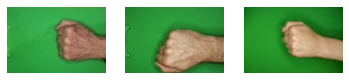

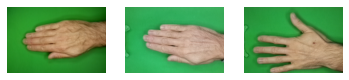

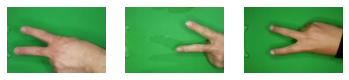

In [3]:
base_dir = '/content/drive/My Drive/Project RPS/rockpaperscissors/rps-cv-images/'

print(os.listdir(base_dir))

train_paper_dir = os.path.join(base_dir + 'paper')
train_rock_dir = os.path.join(base_dir + 'rock')
train_scissors_dir = os.path.join(base_dir + 'scissors')

# memvisualisasikan data dari masing-masing directory
n = 3
for f in [train_rock_dir, train_paper_dir, train_scissors_dir]:
    for i in range(n):
        sp = plt.subplot(1, n, i + 1)
        sp.axis('Off')
        img = mpimg.imread(f + "/" + os.listdir(f)[i])
        plt.imshow(img)
    plt.show()

In [4]:
# Definisi kelas callbacks
class callBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('loss') < 0.04):
            print()
            print("Reached almost 99% accuracy so cancelling training!")
            self.model.stop_training = True


callbacks = callBack()

In [5]:
# membangun arsitektur model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu',input_shape=(100,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),

    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 148, 16)       448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 15, 64)         3

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
# membuat objek data generator
_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.3,horizontal_flip=True, vertical_flip=True, shear_range=0.2,fill_mode='nearest')


In [8]:
# mempersiapkan data latih
train_generator = _datagen.flow_from_directory(
          base_dir,
          target_size=(100, 150),
          batch_size=128,
          class_mode='categorical',
          subset='training')


validation_generator =_datagen.flow_from_directory(
          base_dir,
          target_size=(100,150),
          batch_size=32,
          class_mode='categorical',
          subset='validation')

Found 1546 images belonging to 3 classes.
Found 660 images belonging to 3 classes.


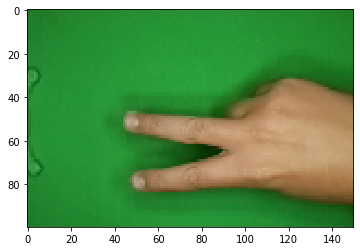

[0. 0. 1.]


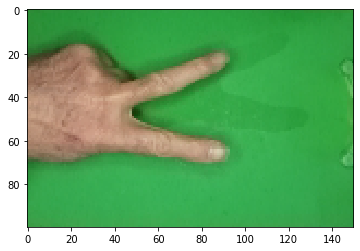

[0. 0. 1.]


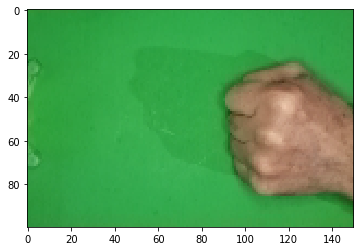

[0. 1. 0.]


In [9]:
# 3 gambar pertama
x, y = train_generator.next()
for i in range(3):
    plt.imshow(x[i], interpolation='nearest')
    plt.show()
    print(y[i])


In [10]:
#training the model
history = model.fit_generator(   
    train_generator,
    steps_per_epoch=train_generator.samples / train_generator.batch_size - 1,
    epochs=10,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples / validation_generator.batch_size - 1,
    callbacks=[callbacks])


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
12/11 [================================] - 30s 2s/step - loss: 1.0852 - accuracy: 0.4217 - val_loss: 0.9329 - val_accuracy: 0.4844
Epoch 2/10
12/11 [================================] - 25s 2s/step - loss: 0.7430 - accuracy: 0.7045 - val_loss: 0.4733 - val_accuracy: 0.8422
Epoch 3/10
12/11 [================================] - 25s 2s/step - loss: 0.3826 - accuracy: 0.8731 - val_loss: 0.2762 - val_accuracy: 0.9047
Epoch 4/10
12/11 [================================] - 25s 2s/step - loss: 0.2591 - accuracy: 0.9111 - val_loss: 0.2011 - val_accuracy: 0.9297
Epoch 5/10
12/11 [================================] - 25s 2s/step - loss: 0.1874 - accuracy: 0.9379 - val_loss: 0.1474 - val_accuracy: 0.9469
Epoch 6/10
12/11 [================================] - 25s 2s/step - loss: 0.1684 - accuracy: 0.9499 - val_loss: 0.1331 - val_accuracy: 0.9500
Epoch 7/10
12/11 [================================] - 24s 2s/step - loss

Saving sc.jpg to sc.jpg
sc.jpg
[[0. 0. 1.]]
IT IS A SCISSORS


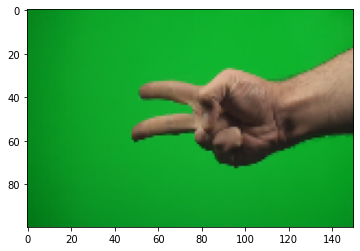

In [12]:
# membuat fitur interaktif untuk memasukkan gambar
from google.colab import files
from keras.preprocessing import image


uploaded = files.upload()

for fn in uploaded.keys():

  # predicting rock, paper, or scissors
  path = fn
  img = image.load_img(path, target_size=(100,150))
  impgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  print(classes,)
  if classes [0][2] == 1:
    print('IT IS A SCISSORS')
  elif classes [0][1] == 1:
    print('IT IS A ROCK')
  else:
    print('IT IS A PAPER')